In [21]:
import np as np
import pandas as pd

In [22]:
df = pd.read_csv('../data/filtered.tsv', sep='\t', encoding='utf-8')
print(df.shape)
df.sample(10)

(577777, 7)


,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
510233,510233,And lock ed up in the harem since we were chil...,we've been locked up in serails since we were ...,0.754308,0.065421,0.966974,0.001926
18414,18414,"OK, bird-brain, is gonna cost you ten bucks.","okay, dumbass, it's gonna cost you 10 bucks.",0.805296,0.021739,0.435466,0.999360
308641,308641,"Damn, it's good to have you back.","hell, it's good to have you back.",0.936639,0.000000,0.997854,0.001193
531061,531061,But now you have a neck at least two involunta...,but now there's at least two unintentional hom...,0.875042,0.029412,0.735888,0.101402
255601,255601,"I mean, wait till you read this fucking thing.",wait till you see this thing.,0.830047,0.361702,0.998730,0.000049
428238,428238,Weaklings.,the Padavan.,0.905378,0.153846,0.971938,0.000059
67474,67474,The colonel was coaching his pilot in how to b...,the colonel wanted to show us how arrogant he ...,0.662331,0.120690,0.028759,0.738845
140689,140689,Talk dirty to me.,just talk to me.,0.728495,0.055556,0.971367,0.000190
159718,159718,Oh! Jeez!,holy crap!,0.767713,0.090909,0.000050,0.989433
560826,560826,What're ya doin' to me?!,what the hell are you doing to me?,0.752275,0.285714,0.000150,0.972788


In [23]:
(df.ref_tox > df.trn_tox).mean()

0.5523618974102465

In [24]:
import numpy as np

# Create a boolean mask that ensures that ref_tox is higher than translation toxicity
condition = df['ref_tox'] > df['trn_tox']

# When the condition is True, 'reference' should be in 'source' and 'translation' in 'target',
# otherwise, 'reference' should be in 'target' and 'translation' in 'source'.
xydf = pd.DataFrame({
    'source': np.where(condition, df['reference'], df['translation']),
    'target': np.where(condition, df['translation'], df['reference'])
})


In [25]:
df.head()

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


def plot_histograms(
        df: pd.DataFrame,
):
    """
    Plot histograms for all numeric columns in a DataFrame.

    Args:
    df (pd.DataFrame): The DataFrame containing the data to plot.
    save (bool, optional): Whether to save the plot to a file. Defaults to False.
    fname_hist (str, optional): The filename for the saved histogram plot. Defaults to 'image/raw_histogram.png'.

    """
    # Determine the number of numeric columns to create an adequate subplot layout
    num_numeric_cols = sum(pd.api.types.is_numeric_dtype(df[col]) for col in df.columns)
    if num_numeric_cols == 0:
        raise ValueError("No numeric columns to plot.")

    # Calculate the number of rows needed for subplots based on the number of numeric columns
    num_rows = int(np.ceil(num_numeric_cols / 2))

    # Create a figure with subplots
    fig, ax = plt.subplots(num_rows, 2, figsize=(2*4, num_rows*3))
    ax = ax.ravel()  # Flatten the array for easy iteration

    # Initialize index for subplots
    i = 0
    for col in df.columns:
        # Skip non-numeric columns
        if not pd.api.types.is_numeric_dtype(df[col]):
            continue

        # Plot histogram for the numeric column
        ax[i].set_xlabel("Value")
        ax[i].set_ylabel("Number of Entries")
        ax[i].set_title(col.replace('_', ' ').capitalize())
        ax[i].hist(df[col], bins=20)  # Use 20 bins for the histogram
        i += 1

    # Adjust the layout to prevent overlap
    plt.tight_layout()

    # Save the plot to a file if requested

    plt.show()



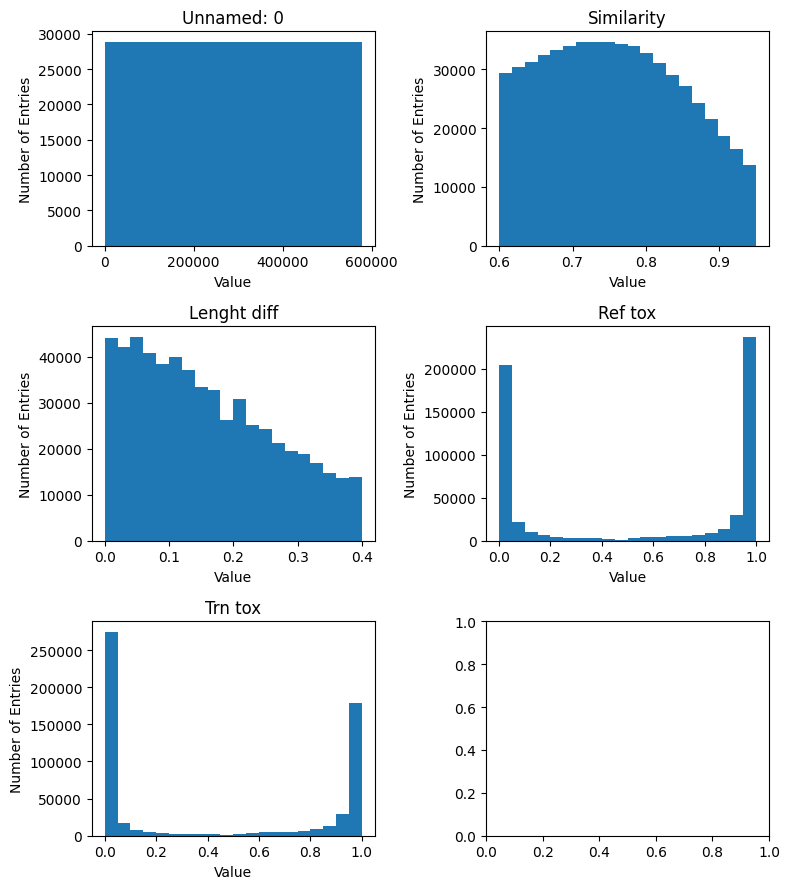

In [27]:

plot_histograms(df);

In [28]:
import pandas as pd
from collections import Counter
from typing import List
import re

def print_most_frequent_words(ref: pd.Series, trans: pd.Series, num_words: int = 10):
    """
    Print the 'num_words' most frequent words and their counts from two pandas Series.

    Args:
    ref (pd.Series): Text data for reference.
    trans (pd.Series): Text data for translation.
    num_words (int, optional): Number of most frequent words to print. Defaults to 10.
    """
    # Define a simple list of stopwords. You can customize this list or use a more comprehensive one.
    stopwords = {'the', 'and', 'is', 'to', 'in', 'that', 'it', 'for', 'as', 'of', 'on', 'with', 'said', 'at', 'a',
                 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as',
                 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can',
                 "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't",
                 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have',
                 "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him',
                 'himself', 'his', 'how', "how's", 'i', "I'd", "I'll", "I'm", "I've", 'if', 'in', 'into', 'is', "isn't",
                 'it', "it's", 'its', 'itself', 'let’s', 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor',
                 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out',
                 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so',
                 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 'then',
                 'there', "there's", 'these', 'they', "they'd", "they'll", "they're", "they've", 'this', 'those',
                 'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', "wasn't", 'we', "we'd", "we'll",
                 "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where', "where's", 'which',
                 'while', 'who', "who's", 'whom', 'why', "why's", 'with', "won't", 'would', "wouldn't", 'you', "you'd",
                 "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves','s','t','re','m','ll','get'}

    # A simple function to clean and split text into words, excluding stopwords.
    def get_clean_words(text: str) -> List[str]:
        # Remove non-alphabetic characters and split text into words.
        words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
        # Filter out stopwords.
        return [word for word in words if word not in stopwords]

    # Concatenate all text data from each Series into a single string.
    ref_text = ' '.join(ref.dropna().tolist())
    trans_text = ' '.join(trans.dropna().tolist())

    # Get clean words from both reference and translation text.
    ref_words = get_clean_words(ref_text)
    trans_words = get_clean_words(trans_text)

    # Count the words and get the 'num_words' most common words.
    ref_word_freq = Counter(ref_words).most_common(num_words)
    trans_word_freq = Counter(trans_words).most_common(num_words)

    # Print the most common words and their counts.
    print(f"Top {num_words} most frequent words in reference text:")
    for word, count in ref_word_freq:
        print(f"'{word}': {count}")

    print(f"\nTop {num_words} most frequent words in translation text:")
    for word, count in trans_word_freq:
        print(f"'{word}': {count}")



In [29]:
print_most_frequent_words(xydf['source'],xydf['target'])

Top 10 most frequent words in reference text:
'like': 34417
'don': 32779
'shit': 32026
'fucking': 30957
'just': 23079
'know': 21495
'damn': 21194
'kill': 20882
'hell': 20605
'fuck': 20467

Top 10 most frequent words in translation text:
'don': 33230
'like': 31658
'just': 21860
'know': 21793
'one': 19885
'want': 18315
'will': 17004
'hell': 14495
'man': 14350
'now': 13405


In [30]:
import pandas as pd

def save_dataframe_to_tsv(df: pd.DataFrame, file_path: str):
    """
    Save a DataFrame to a file in TSV format.

    Args:
    df (pd.DataFrame): The DataFrame to be saved.
    file_path (str): The path to the file where the DataFrame should be saved.
    """
    try:
        # Save the DataFrame to the file path in TSV format.
        df.to_csv(file_path, sep='\t', index=False)
        print(f"DataFrame successfully saved to {file_path}")
    except Exception as e:
        # If there's an error, print it out.
        print(f"An error occurred while saving the DataFrame: {e}")


save_dataframe_to_tsv(xydf, '../data/xydf.tsv')


DataFrame successfully saved to ../data/xydf.tsv
